# Customer Churn Prediction

Our aim is to build a model to predict customer churn based on given dataset. The data consists of financial details like Credit Score, Balance, Number of Products/Services opted from bank, salary, credit card details etc.. The dataset also consist of demographic details. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Quick Review of Data

In [2]:
df=pd.read_csv("Churn Modeling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()  # So we can see that there are 10 numerical features and four categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()  # No null values in the dataset


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

We can see here that dataset is imbalanced.

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Since customerId is unique and the count is equal to number of rows; there are no duplicates in the dataset.

## 2. Basic EDA

We will try to understand how different features are related and their dependencies

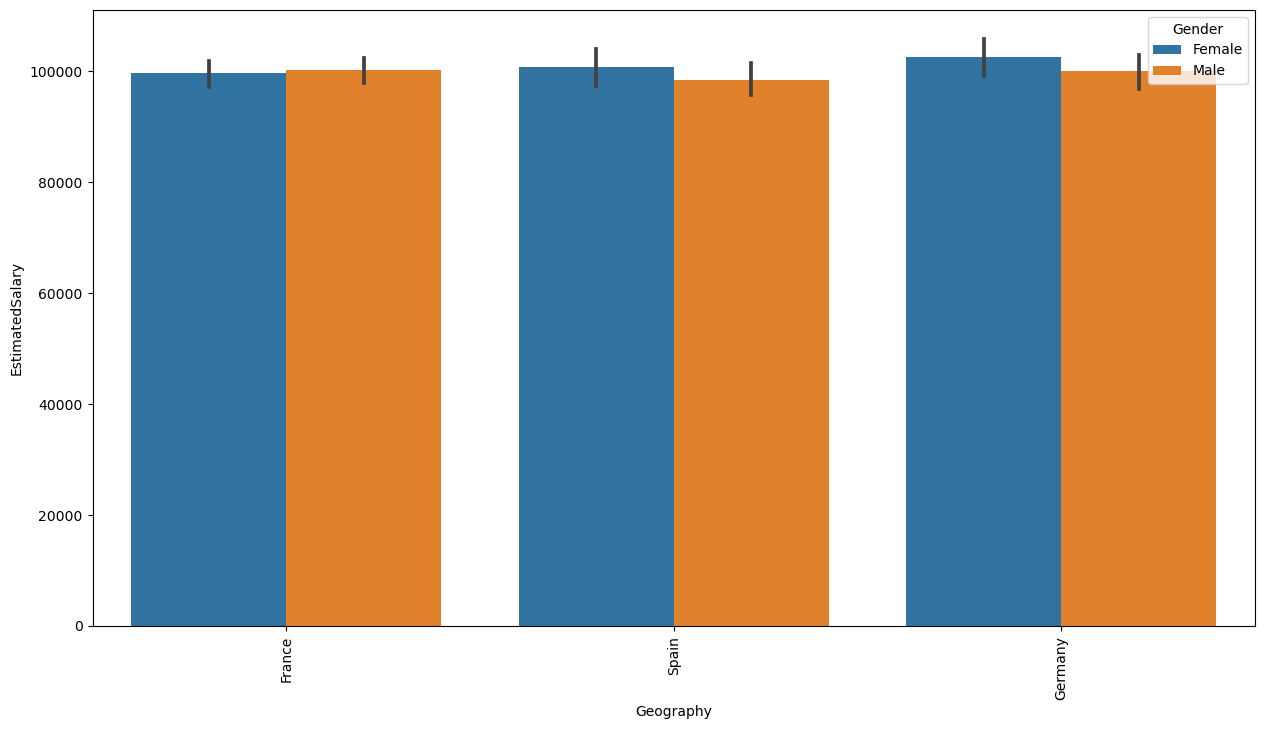

In [11]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender',data=df)
plt.show()

The estimated salary remains almost same for most of the countries. The difference between salaries based on gender is marginal. 

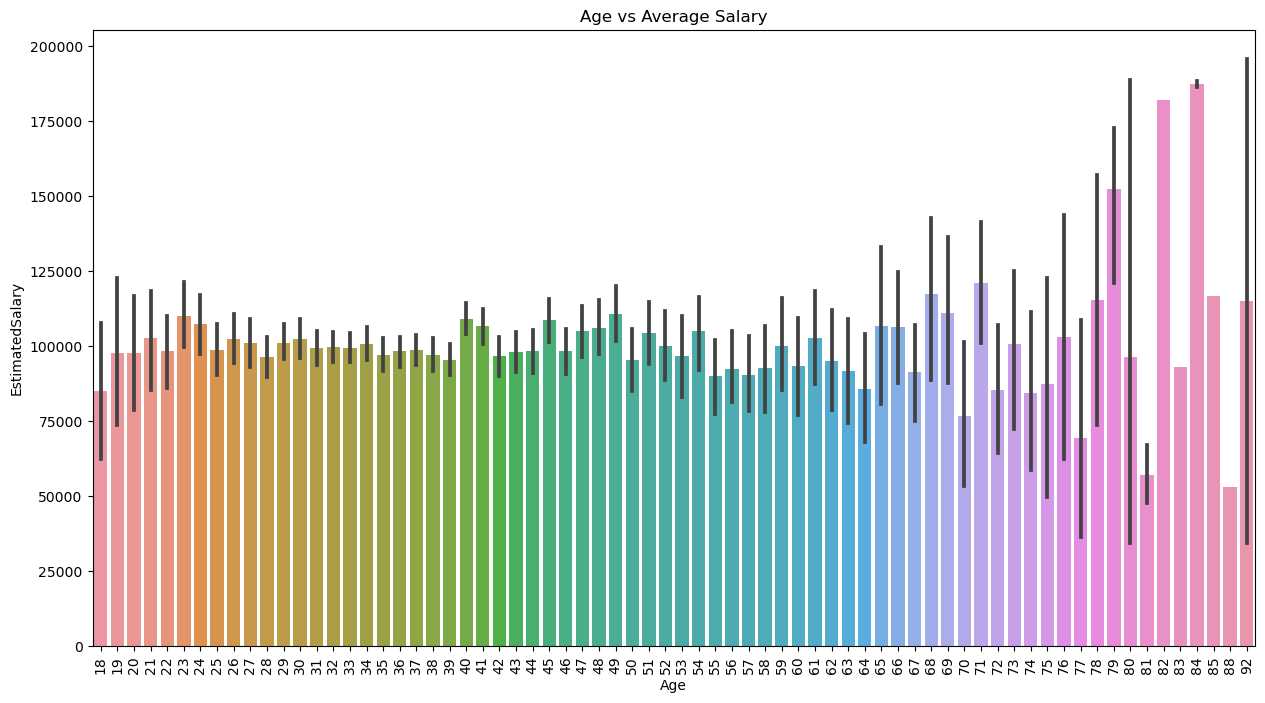

In [39]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',data=df)
plt.title('Age vs Average Salary')
plt.show()

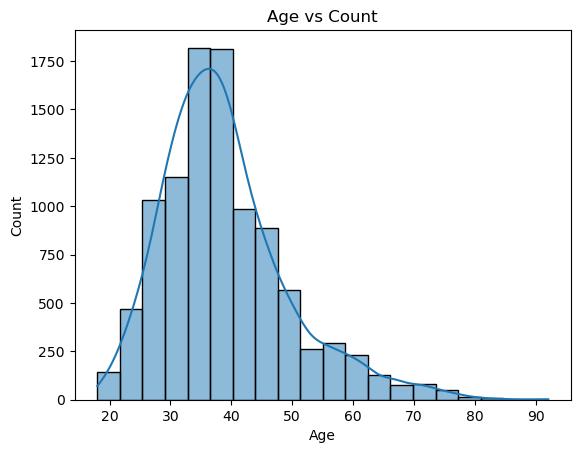

In [13]:
sns.histplot(x=df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Count')
plt.show()

We can understand that, most of the customers are in the range of working age group as expected. The average salary increases, slightly with age. We can see there are few outliers in the younger and elderly age groups which is evident by average line.

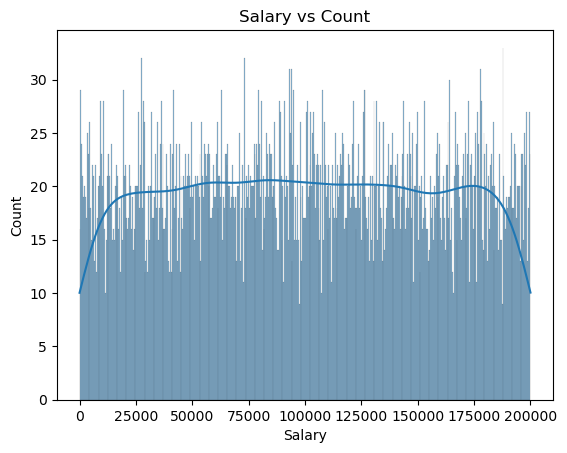

In [14]:
sns.histplot(x=df['EstimatedSalary'], bins=500, kde=True)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary vs Count')
plt.show()

We can see that except for few people the salary remains similar for most of them. 

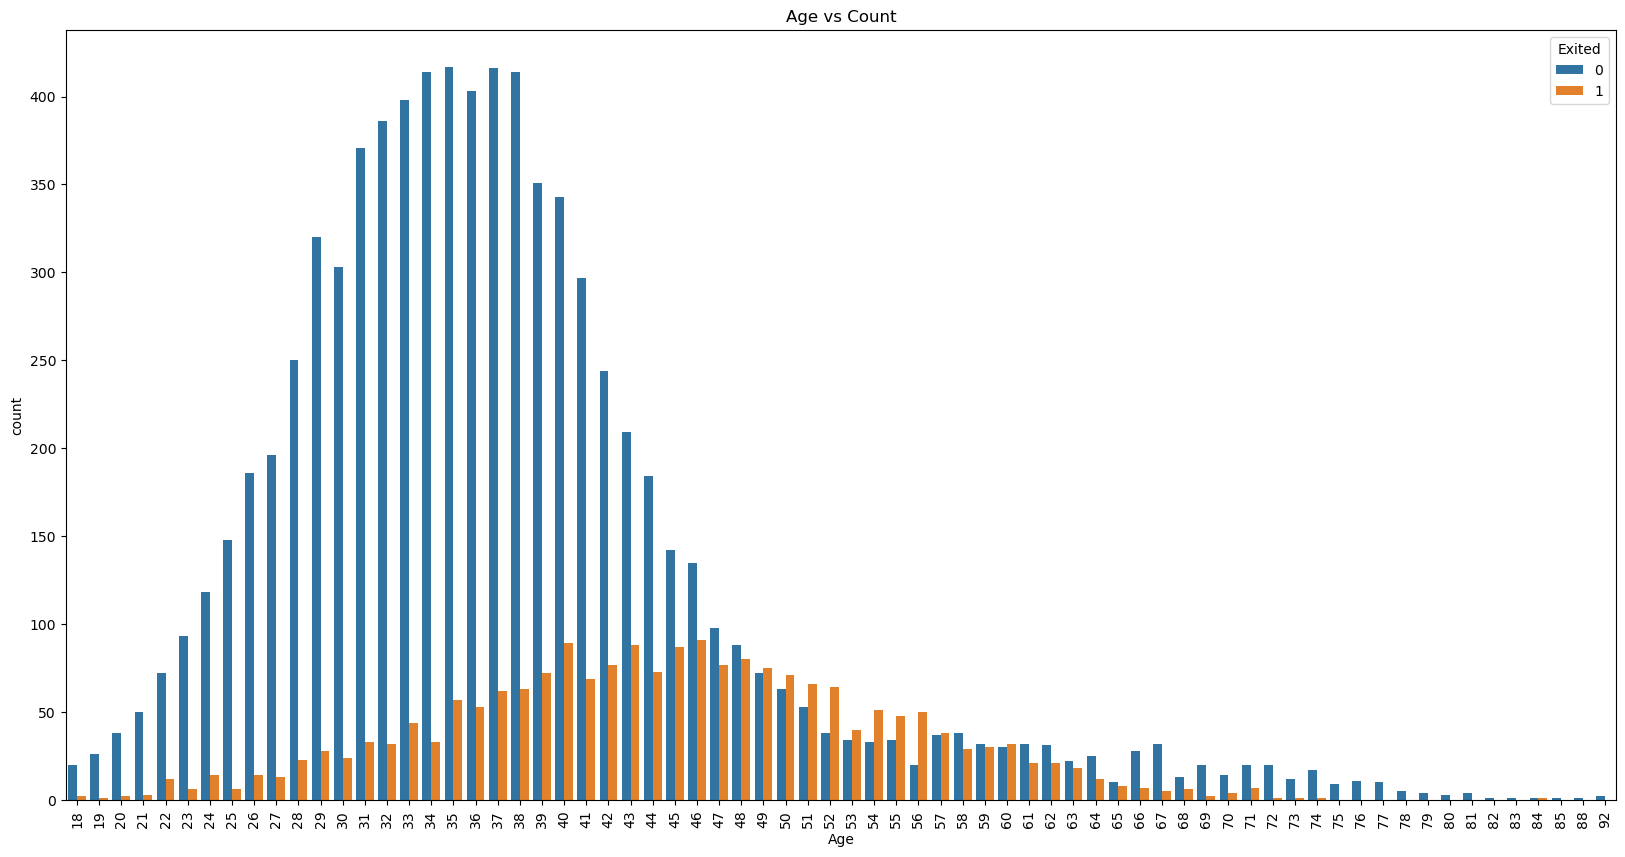

In [40]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(x='Age', hue='Exited', data=df)
plt.title('Age vs Count')
plt.show()

As we can see from the graph, as the age of customer increases, the number of peopele opting away from service is increasing. The people opting for service is skewed towards left. From age of 47 number of people opting out is almost equal to number of people continuing the service.

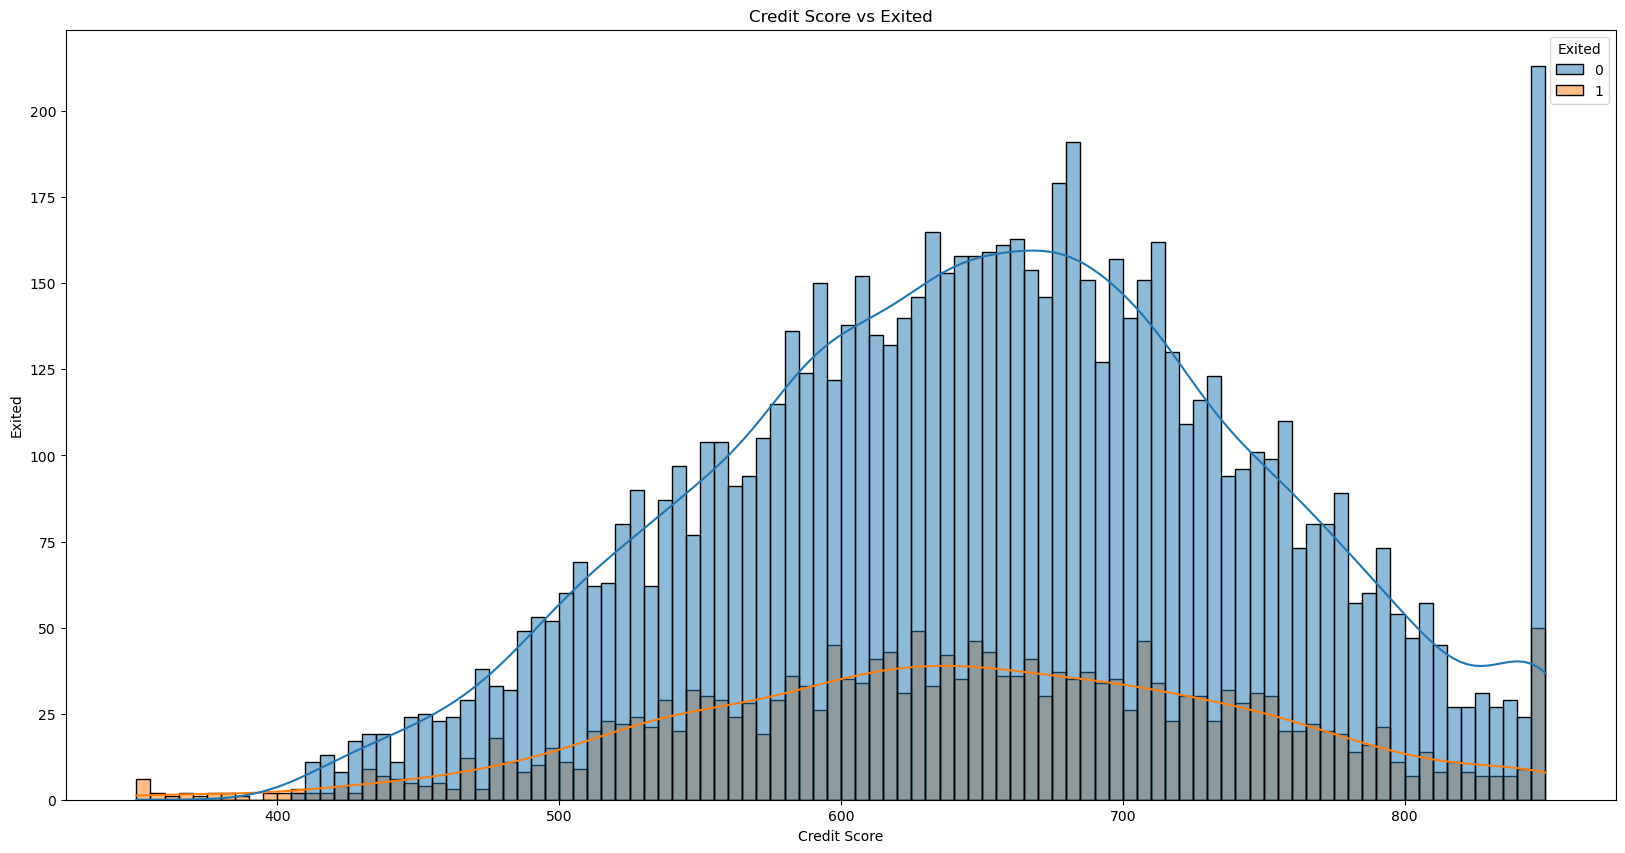

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(x=df['CreditScore'], hue=df['Exited'] ,bins=100, kde=True)
plt.xlabel('Credit Score')
plt.ylabel('Exited')
plt.title('Credit Score vs Exited')
plt.show()

We can see that people having medium credit score have opted out from the service more in number.

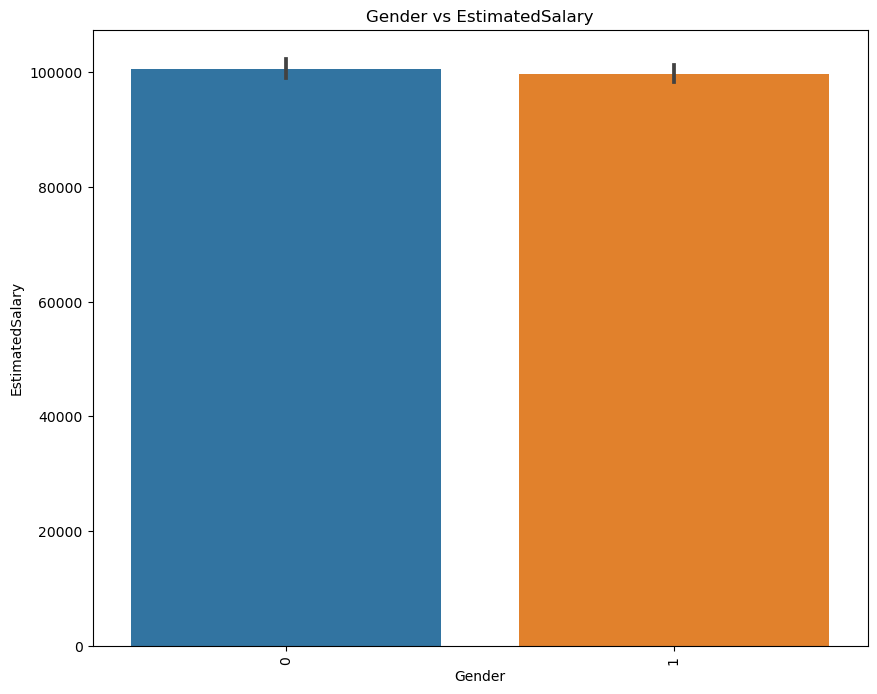

In [43]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Gender vs EstimatedSalary')
sns.barplot(x='Gender',y='EstimatedSalary',data=df);


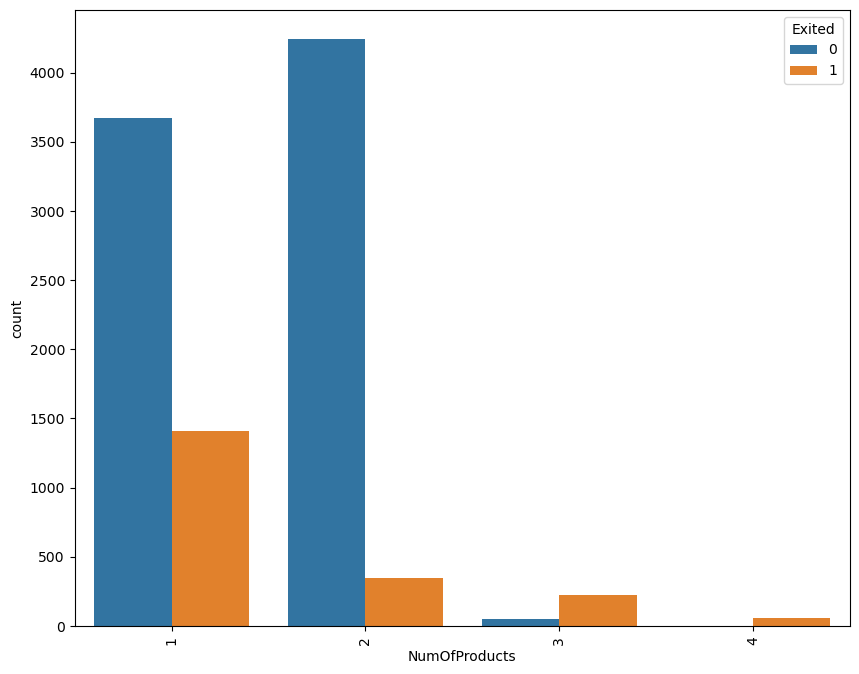

In [20]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.countplot(x='NumOfProducts',data=df, hue='Exited');

It turns out that customers having multiple product are less likely to opt out. So more the products less chance of chrun-out

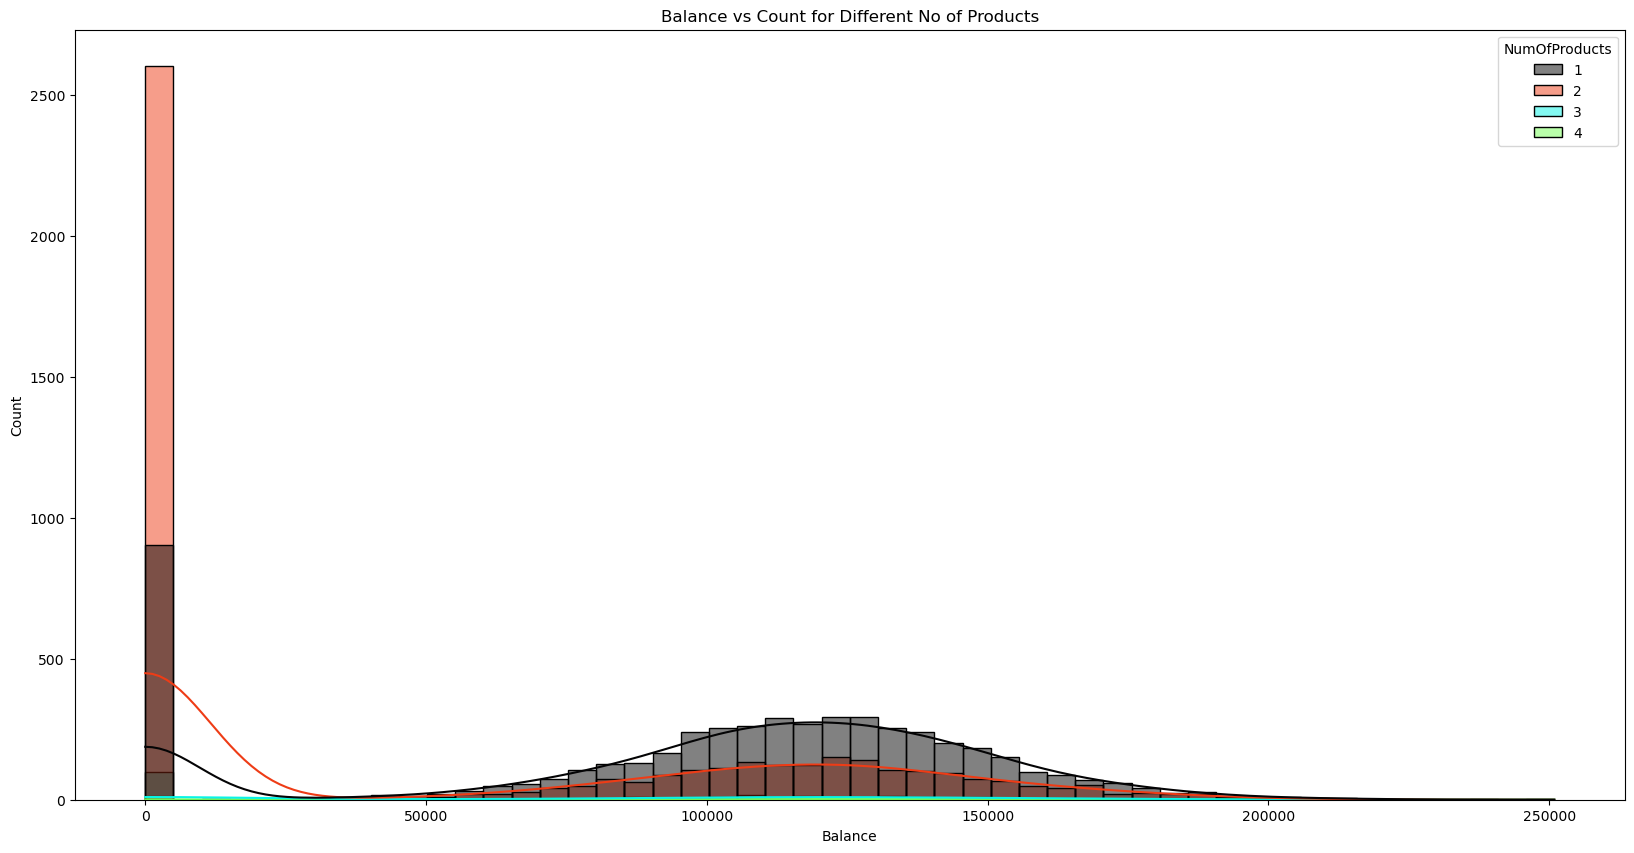

In [48]:
custom_palette = ["#040405", "#EE3C16", "#08F4E6", "#77FF57"]

plt.figure(figsize=(20, 10))
sns.histplot(x=df['Balance'], hue=df['NumOfProducts'] ,bins=50, kde=True, palette=custom_palette)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance vs Count for Different No of Products')
plt.show()

<Axes: xlabel='Balance'>

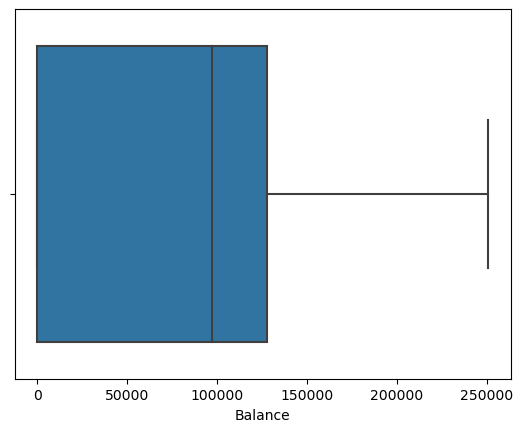

In [51]:
sns.boxplot(x=df['Balance'])

We can see that most of the balance are well below 1000. The average balance is around 9000

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

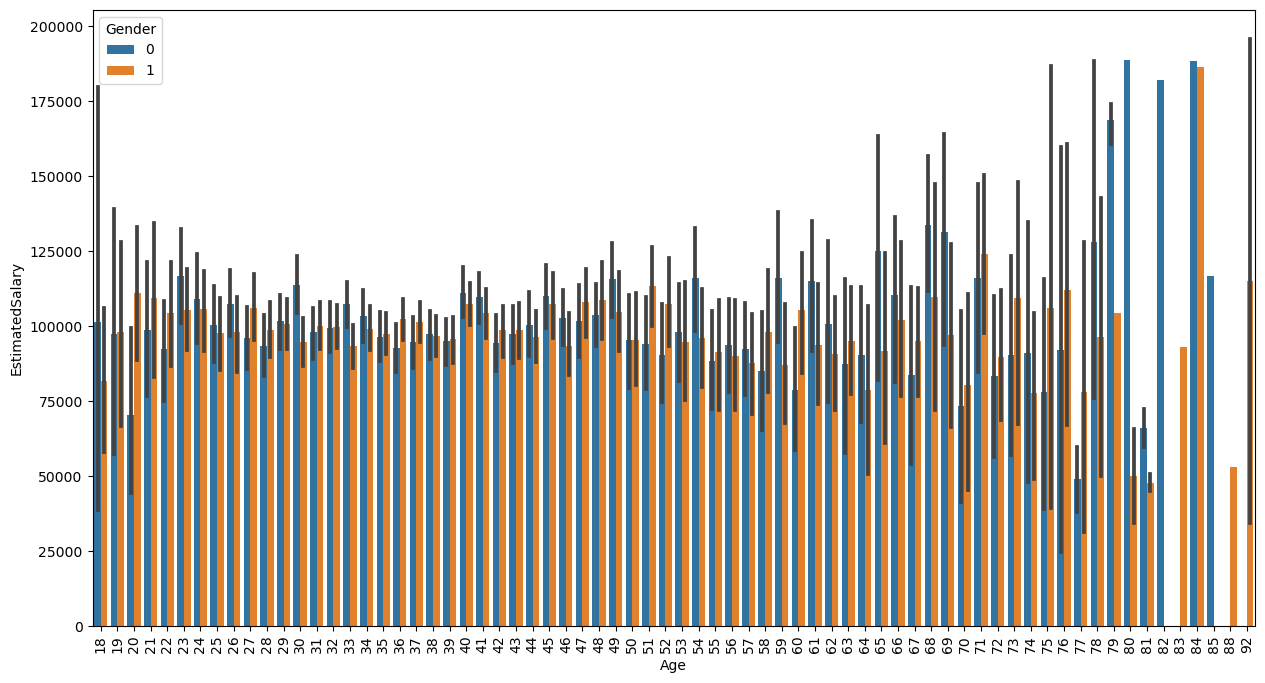

In [52]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',hue='Gender',data=df)

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

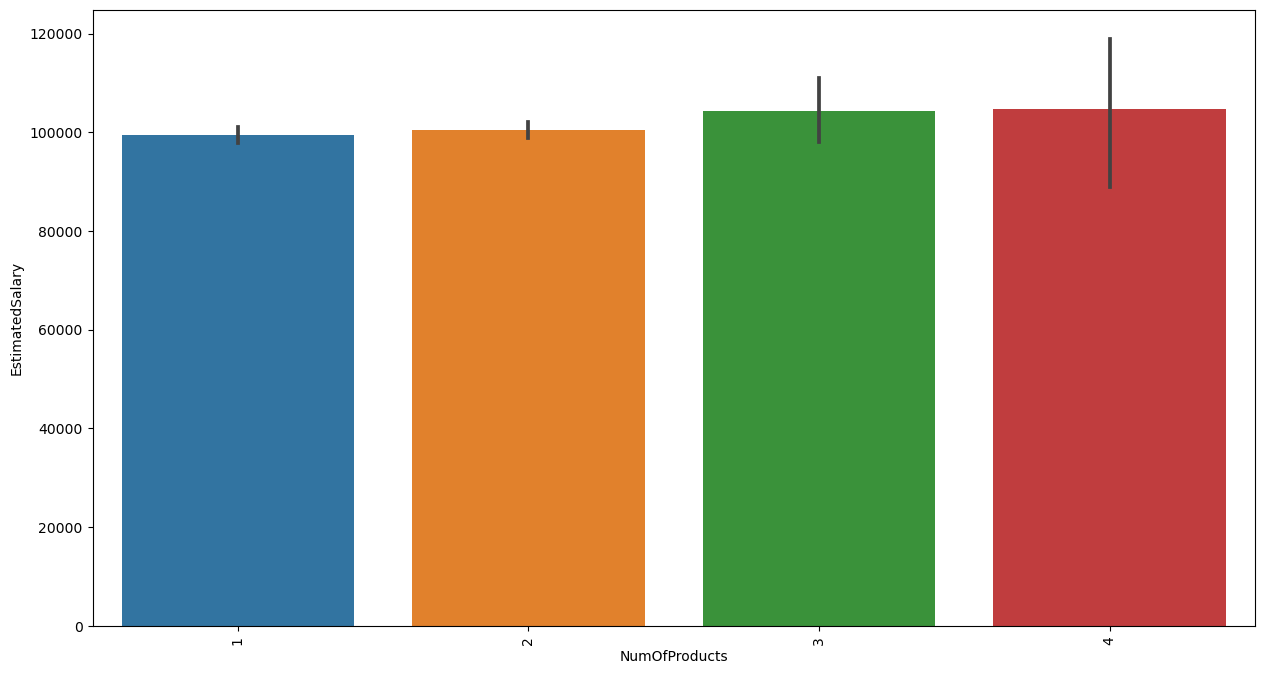

In [54]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='NumOfProducts',y='EstimatedSalary',data=df)

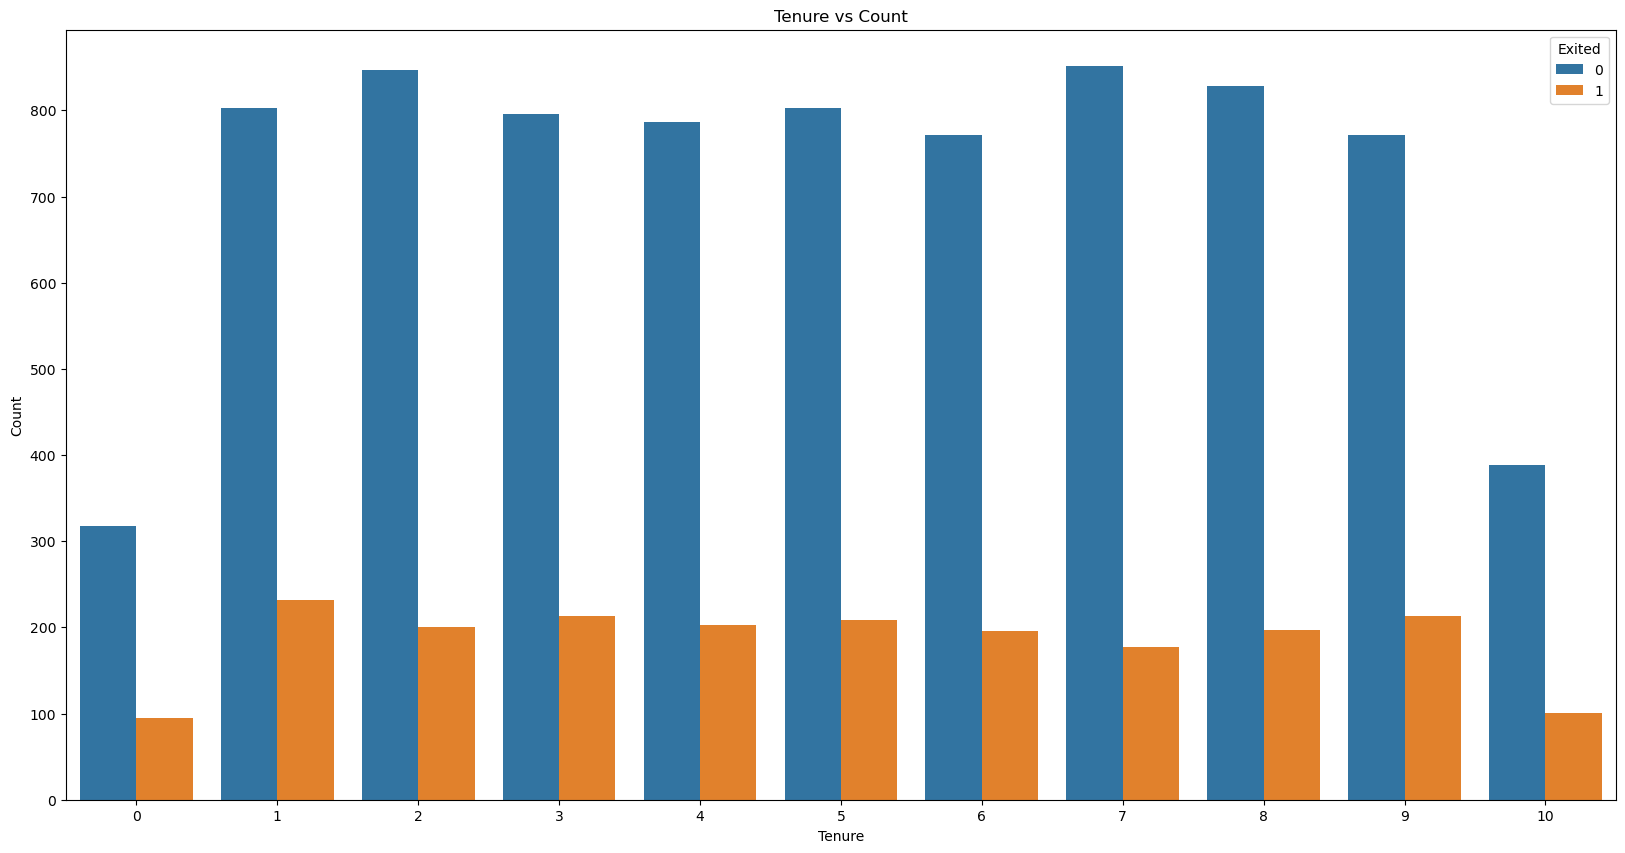

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure vs Count')
plt.show()

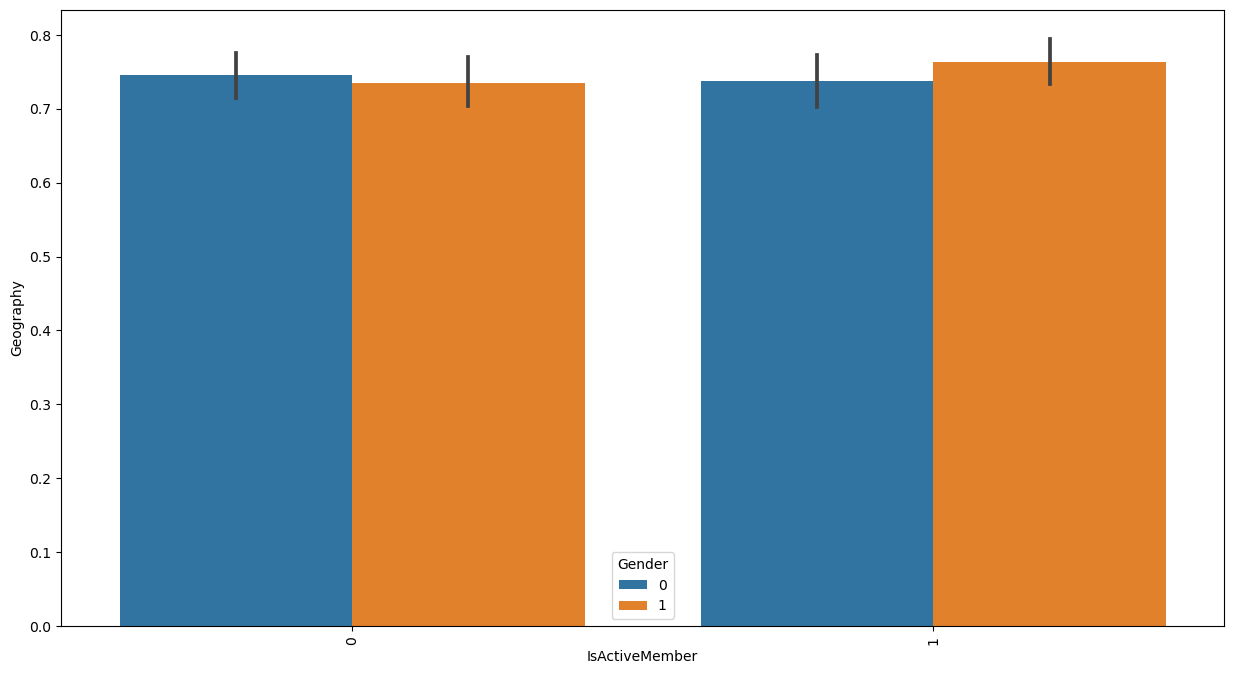

In [56]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Geography',hue='Gender',data=df)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

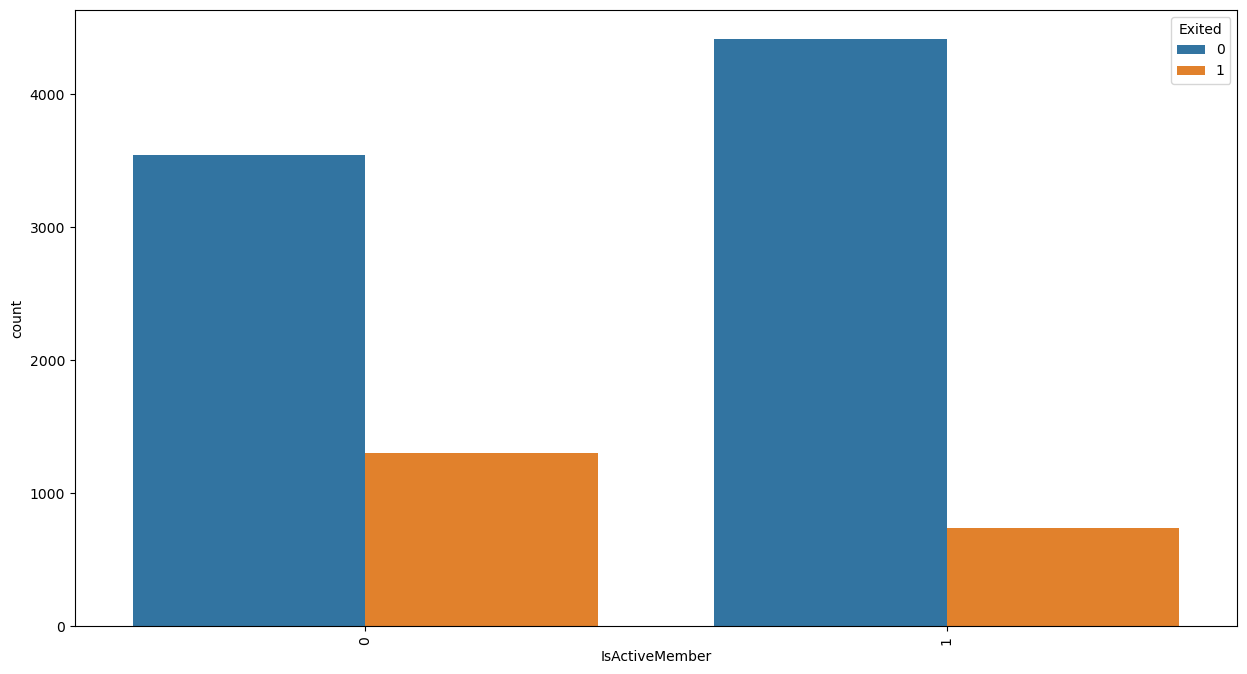

In [57]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

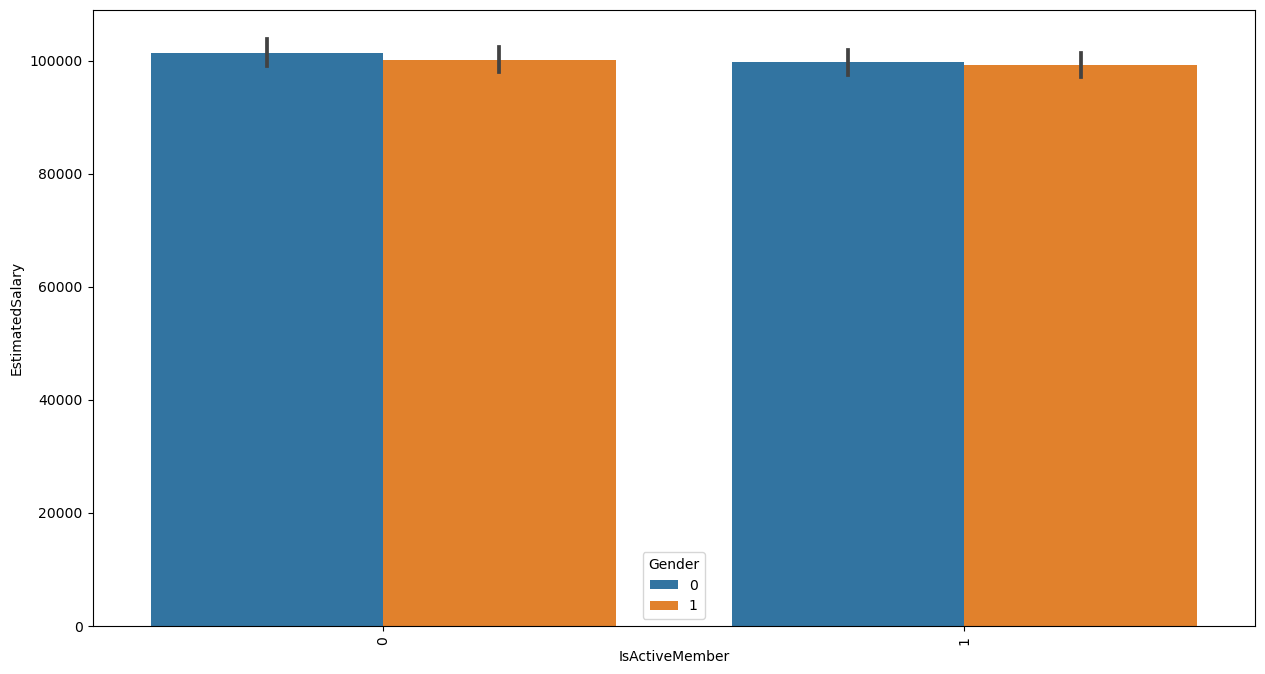

In [58]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df)
plt.show()

In [59]:
# Encoding Gender to get numerical feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])

In [60]:
# Encoding Geography( different countries) to get numerical feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Geography'])
df['Geography']=le.transform(df['Geography'])

In [61]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

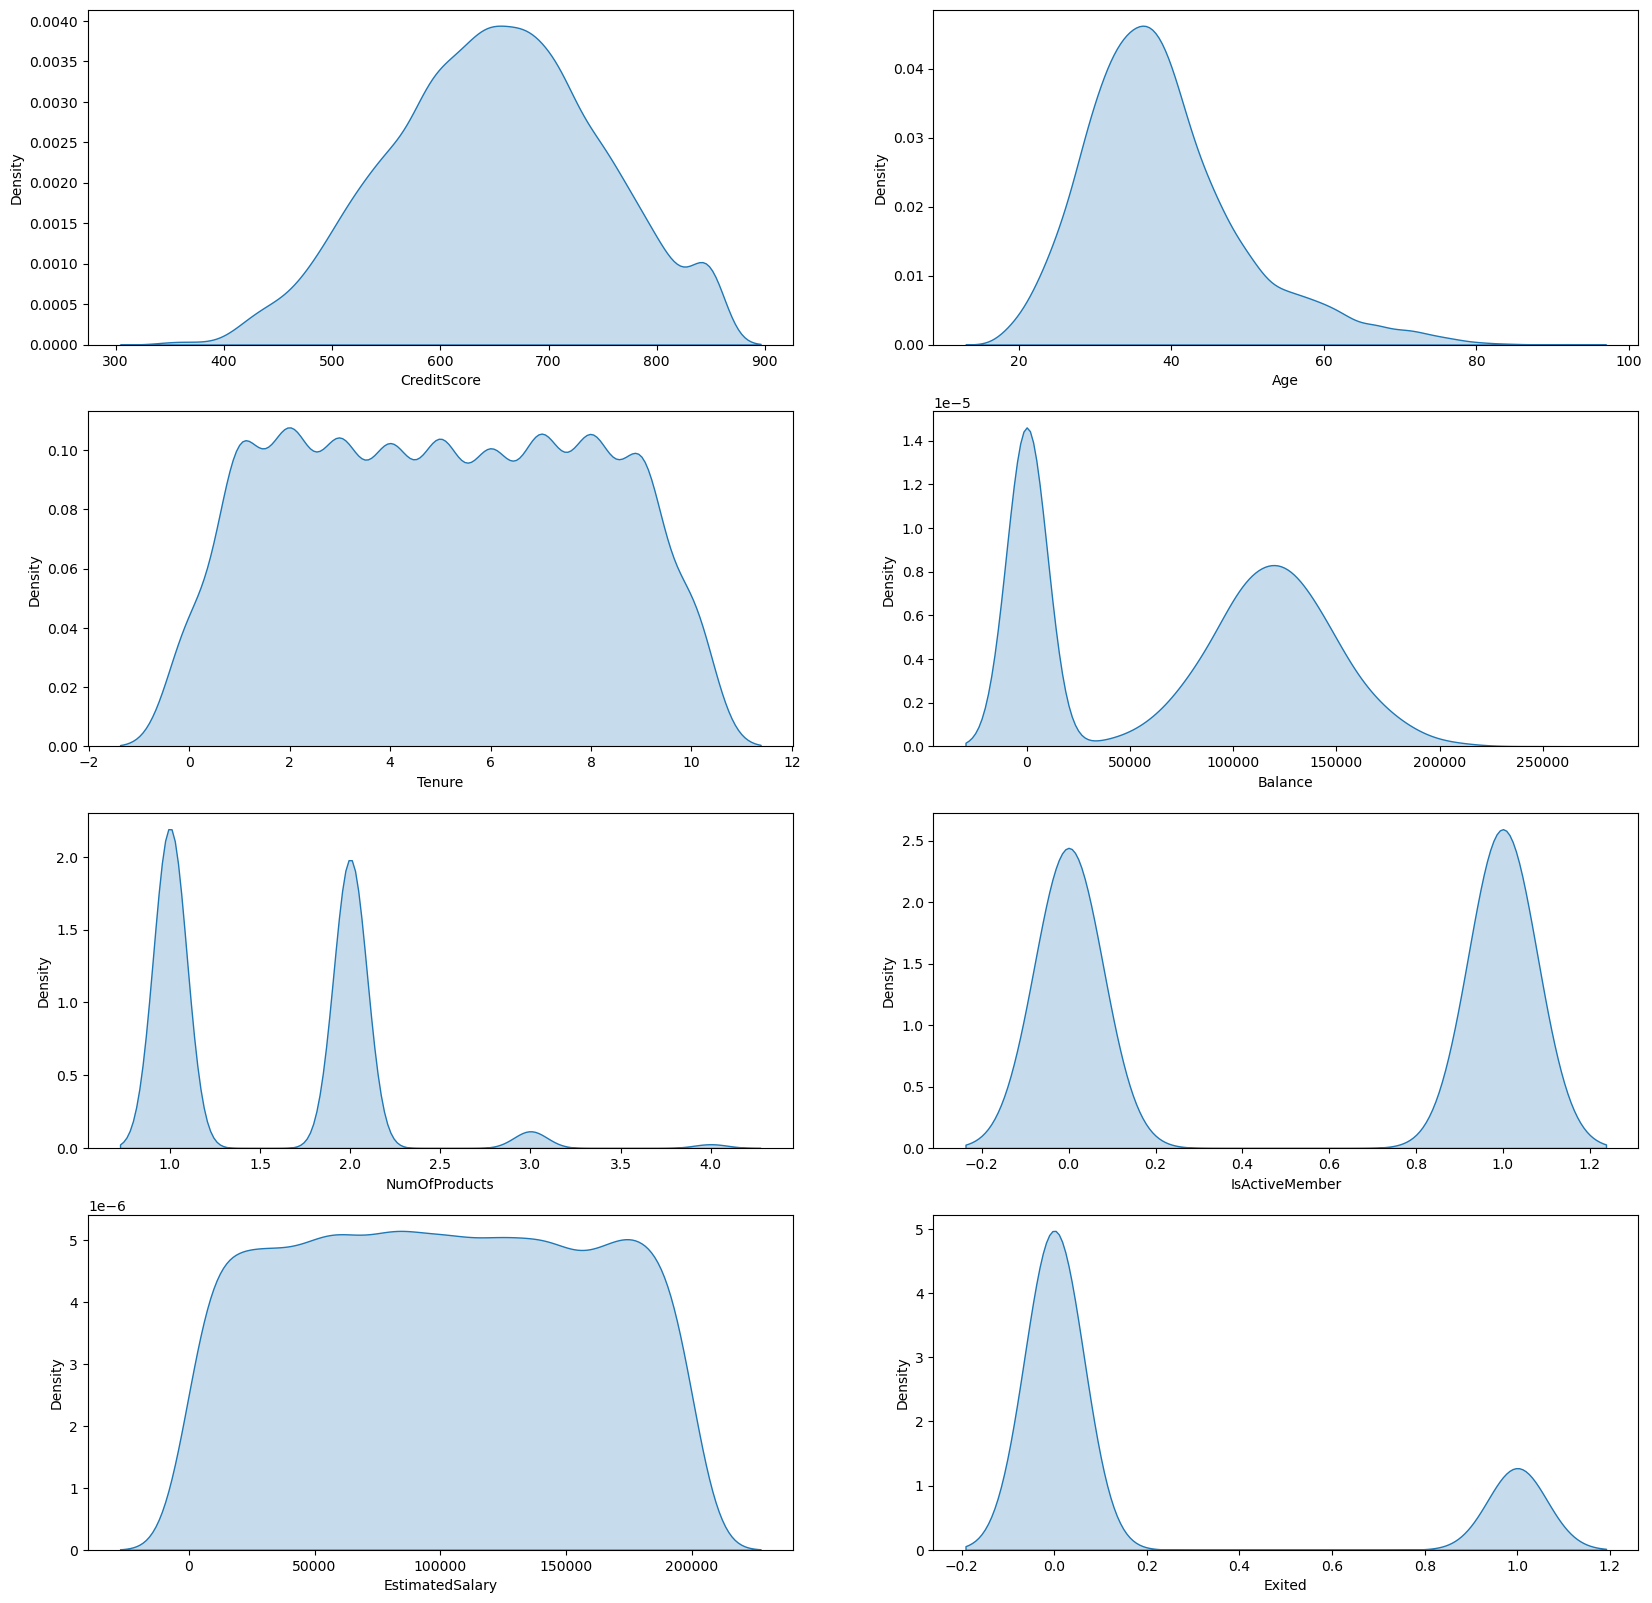

In [32]:
plt.figure(figsize=(20, 20), facecolor='white')

for i, column in enumerate(['CreditScore', 
        'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], start=1):
    ax = plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=column, fill=True) 
    plt.xlabel(column, fontsize=10)
    

plt.show()

In [33]:
drop_columns=['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=drop_columns, inplace=True)

In [34]:
X=df.drop(labels=['Exited'],axis=1)
y=df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)


In [36]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 6347, 1: 1653})
Resample dataset shape Counter({0: 6347, 1: 6347})


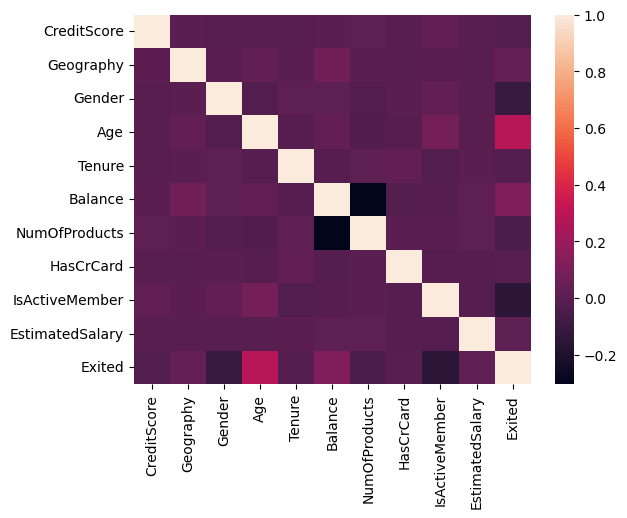

In [37]:
sns.heatmap(df.corr())
plt.show()

## Summary So Far

* We saw that churn rate depends on multiple factors like income, number of products, tenure of loan taken, crediscroe rating, age, bank balance, active relationship with bank
* The average income increased slightly with age. But there were few outliers.Which says that there are High Networth Individual in all the age groups.
* Number of products tells a lot about churn prediction, higher the products less likely to churn. So more relationship with a financial instituion indicates more trust.
* As age increases number of people opting out from service also increased.
* There is near bimodal distribution for balance. Either customer have less balance( less than thousand) or very high balance( around lakhs).
* The dataset is slightly imbalanced. For better performance we have used SMOTE algorithm.


As we can see there is very less correlation between each variables. This implies there is no multicollinearity

In [37]:

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc,f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, recall_score

### Logistic Regression

In [80]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train_smote, y_train_smote)

y_train_pred = logreg.predict(X_train_smote)

y_test_pred = logreg.predict(X_test)

print("Train Data - Model accuracy: ", accuracy_score(y_train_smote, y_train_pred))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train_smote, y_train_pred))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train_smote, y_train_pred))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train_smote, y_train_pred))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train_smote, y_train_pred))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train_smote, y_train_pred))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred))


Train Data - Model accuracy:  0.6719710099259493
Test Data - Model accuracy:  0.6725


-------------------------
Train Data - ROC Score:  0.6719710099259493
Test Data - ROC Score:  0.6603496287128714


-------------------------
Train Data - Confusion Matrix: [[4207 2140]
 [2024 4323]]
Test Data - Confusion Matrix: [[1099  517]
 [ 138  246]]


-------------------------
Train Data - F1 Score: 0.6749414519906323
Test Data - F1 Score: 0.42894507410636445


-------------------------
Train Data - Precesion Score: 0.6688844190004641
Test Data - Precesion Score: 0.3224115334207077


-------------------------
Train Data - Recall Score: 0.6811091854419411
Test Data - Recall Score: 0.640625


Since data is quite imbalanced, there is no much point looking at Model Accuracy. But looking at F1 score we can say that, model is not performing as expected. 

### Gaussian NB

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_smote,y_train_smote)


y_train_pred_gnb = gnb.predict(X_train_smote)

y_test_pred_gnb = gnb.predict(X_test)

print("Train Data - Model accuracy: ", accuracy_score(y_train_smote, y_train_pred_gnb))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred_gnb))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train_smote, y_train_pred_gnb))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred_gnb))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train_smote, y_train_pred_gnb))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred_gnb))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train_smote, y_train_pred_gnb))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred_gnb))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train_smote, y_train_pred_gnb))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred_gnb))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train_smote, y_train_pred_gnb))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred_gnb))


Train Data - Model accuracy:  0.7125413581219474
Test Data - Model accuracy:  0.669


-------------------------
Train Data - ROC Score:  0.7125413581219473
Test Data - ROC Score:  0.6879641089108911


-------------------------
Train Data - Confusion Matrix: [[4191 2156]
 [1493 4854]]
Test Data - Confusion Matrix: [[1062  554]
 [ 108  276]]


-------------------------
Train Data - F1 Score: 0.7268099124054803
Test Data - F1 Score: 0.4546952224052718


-------------------------
Train Data - Precesion Score: 0.6924393723252497
Test Data - Precesion Score: 0.3325301204819277


-------------------------
Train Data - Recall Score: 0.7647707578383488
Test Data - Recall Score: 0.71875


In [83]:
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier()

rfclf.fit(X_train,y_train)

y_train_pred_rf = rfclf.predict(X_train)
y_test_pred_rf = rfclf.predict(X_test)


print("Train Data - Model accuracy: ", accuracy_score(y_train, y_train_pred_rf))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred_rf))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train, y_train_pred_rf))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred_rf))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train, y_train_pred_rf))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred_rf))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train, y_train_pred_rf))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred_rf))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train, y_train_pred_rf))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred_rf))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train, y_train_pred_rf))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred_rf))

Train Data - Model accuracy:  1.0
Test Data - Model accuracy:  0.815


-------------------------
Train Data - ROC Score:  1.0
Test Data - ROC Score:  0.7574644183168316


-------------------------
Train Data - Confusion Matrix: [[6347    0]
 [   0 6347]]
Test Data - Confusion Matrix: [[1375  241]
 [ 129  255]]


-------------------------
Train Data - F1 Score: 1.0
Test Data - F1 Score: 0.5795454545454546


-------------------------
Train Data - Precesion Score: 1.0
Test Data - Precesion Score: 0.5141129032258065


-------------------------
Train Data - Recall Score: 1.0
Test Data - Recall Score: 0.6640625


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier()

knnclf.fit(X_train_smote,y_train_smote)

y_train_pred_knn = knnclf.predict(X_train_smote)
y_test_pred_knn = knnclf.predict(X_test)


print("Train Data - Model accuracy: ", accuracy_score(y_train_smote, y_train_pred_knn))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred_knn))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train_smote, y_train_pred_knn))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred_knn))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train_smote, y_train_pred_knn))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred_knn))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train_smote, y_train_pred_knn))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred_knn))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train_smote, y_train_pred_knn))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred_knn))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train_smote, y_train_pred_knn))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred_knn))

Train Data - Model accuracy:  0.7988813612730424
Test Data - Model accuracy:  0.564


-------------------------
Train Data - ROC Score:  0.7988813612730423
Test Data - ROC Score:  0.5058529290429042


-------------------------
Train Data - Confusion Matrix: [[4621 1726]
 [ 827 5520]]
Test Data - Confusion Matrix: [[970 646]
 [226 158]]


-------------------------
Train Data - F1 Score: 0.8121827411167513
Test Data - F1 Score: 0.26599326599326595


-------------------------
Train Data - Precesion Score: 0.7617996135799061
Test Data - Precesion Score: 0.19651741293532338


-------------------------
Train Data - Recall Score: 0.8697022215219788
Test Data - Recall Score: 0.4114583333333333


In [85]:
import xgboost as xgb

xgbclf =xgb.XGBClassifier()

xgbclf.fit(X_train_smote, y_train_smote)

y_train_pred_xgb = xgbclf.predict(X_train_smote)
y_test_pred_xgb = xgbclf.predict(X_test)





print("Train Data - Model accuracy: ", accuracy_score(y_train_smote, y_train_pred_xgb))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred_xgb))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train_smote, y_train_pred_xgb))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred_xgb))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train_smote, y_train_pred_xgb))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred_xgb))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train_smote, y_train_pred_xgb))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred_xgb))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train_smote, y_train_pred_xgb))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred_xgb))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train_smote, y_train_pred_xgb))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred_xgb))

Train Data - Model accuracy:  0.9545454545454546
Test Data - Model accuracy:  0.808


-------------------------
Train Data - ROC Score:  0.9545454545454545
Test Data - ROC Score:  0.7561107673267327


-------------------------
Train Data - Confusion Matrix: [[6034  313]
 [ 264 6083]]
Test Data - Confusion Matrix: [[1358  258]
 [ 126  258]]


-------------------------
Train Data - F1 Score: 0.9547202385623479
Test Data - F1 Score: 0.5733333333333334


-------------------------
Train Data - Precesion Score: 0.9510631644777986
Test Data - Precesion Score: 0.5


-------------------------
Train Data - Recall Score: 0.9584055459272097
Test Data - Recall Score: 0.671875


## Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 4)]

max_depth = [int(x) for x in np.linspace(7, 20,3)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [48]:
rfclf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rfclf,param_distributions=random_grid,n_iter=30,cv=5,verbose=2,
                               random_state=100)
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   4.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   4.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   4.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   5.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   4.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   2.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   2.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=14, n_estimators=100; tota

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   7.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=5, n_estimators=366; total time=   5.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=5, n_estimators=366; total time=   5.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=5, n_estimators=366; total time=   5.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=5, n_estimators=366; total time=   5.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=5, n_estimators=366; total time=   5.3s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   5.3s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   5.4s
[CV] END criterion=entropy, max_depth=13, min_

[CV] END criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   4.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=10, n_estimators=366; total time=   4.6s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=10, n_estimators=366; total time=   4.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=10, n_estimators=366; total time=   4.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=10, n_estimators=366; total time=   4.6s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=10, n_estimators=366; total time=   4.7s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=233; total time=   3.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=233; total time=   3.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [7, 13, 20],
                                        'min_samples_leaf': [1, 2, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 233, 366, 500]},
                   random_state=100, verbose=2)

In [49]:
rf_randomcv.best_params_
# best parameters

{'n_estimators': 233,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 13,
 'criterion': 'gini'}

In [50]:
rf_randomcv
# displaying all parameters

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [7, 13, 20],
                                        'min_samples_leaf': [1, 2, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 233, 366, 500]},
                   random_state=100, verbose=2)

In [51]:
rf_randomcv.best_estimator_
# Displaying best parameters from all parameters mentioned above

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=233)

In [55]:
best_rfclf=rf_randomcv.best_estimator_
# saving all parameters in best_random_grid

In [73]:

best_rfclf=RandomForestClassifier(n_estimators=700, max_depth=11, min_samples_split=5, min_samples_leaf=5,  max_features=None)

In [87]:
best_rfclf.fit(X_train, y_train)


y_train_pred_rf_rcv=best_rfclf.predict(X_train)
y_test_pred_rf_rcv=best_rfclf.predict(X_test)


print("Train Data - Model accuracy: ", accuracy_score(y_train, y_train_pred_rf_rcv))
print("Test Data - Model accuracy: ", accuracy_score(y_test, y_test_pred_rf_rcv))

print("\n")
print('-'*25)

print("Train Data - ROC Score: ", roc_auc_score(y_train, y_train_pred_rf_rcv))
print("Test Data - ROC Score: ", roc_auc_score(y_test, y_test_pred_rf_rcv))

print("\n")
print('-'*25)

print("Train Data - Confusion Matrix:", confusion_matrix(y_train, y_train_pred_rf_rcv))
print("Test Data - Confusion Matrix:", confusion_matrix(y_test, y_test_pred_rf_rcv))

print("\n")
print('-'*25)

print("Train Data - F1 Score:", f1_score(y_train, y_train_pred_rf_rcv))
print("Test Data - F1 Score:", f1_score(y_test, y_test_pred_rf_rcv))

print("\n")
print('-'*25)
      
print("Train Data - Precesion Score:", precision_score(y_train, y_train_pred_rf_rcv))
print("Test Data - Precesion Score:", precision_score(y_test, y_test_pred_rf_rcv))
 
print("\n")
print('-'*25)
      
print("Train Data - Recall Score:", recall_score(y_train, y_train_pred_rf_rcv))
print("Test Data - Recall Score:", recall_score(y_test, y_test_pred_rf_rcv))

Train Data - Model accuracy:  0.903125
Test Data - Model accuracy:  0.8745


-------------------------
Train Data - ROC Score:  0.788171736774718
Test Data - ROC Score:  0.7416718234323432


-------------------------
Train Data - Confusion Matrix: [[6246  101]
 [ 674  979]]
Test Data - Confusion Matrix: [[1547   69]
 [ 182  202]]


-------------------------
Train Data - F1 Score: 0.716428832784486
Test Data - F1 Score: 0.616793893129771


-------------------------
Train Data - Precesion Score: 0.9064814814814814
Test Data - Precesion Score: 0.7453874538745388


-------------------------
Train Data - Recall Score: 0.5922565033272837
Test Data - Recall Score: 0.5260416666666666
